In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("resultado_filtro_2.csv")
df
## lee el archivo almacenado

,power,signal,delta,filtered
0,290,295,5,4
1,291,293,2,1
2,247,264,17,-1
3,284,259,-25,-5
4,244,248,4,-7
5,334,329,-5,-3
6,347,349,2,-1
7,328,307,-21,-4
8,196,207,11,-9
9,245,259,14,-13


In [3]:
df.corr()
## mustra correlacion entre datos

,power,signal,delta,filtered
power,1.000000,0.891262,-0.428034,-0.183834
signal,0.891262,1.000000,0.028355,0.002613
delta,-0.428034,0.028355,1.000000,0.410423
filtered,-0.183834,0.002613,0.410423,1.000000


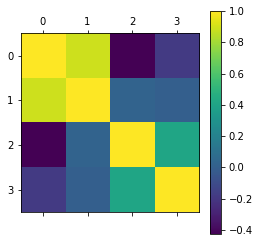

In [4]:
plt.matshow(df.corr())
plt.colorbar()
## representa graficamente la correlacion entre datos

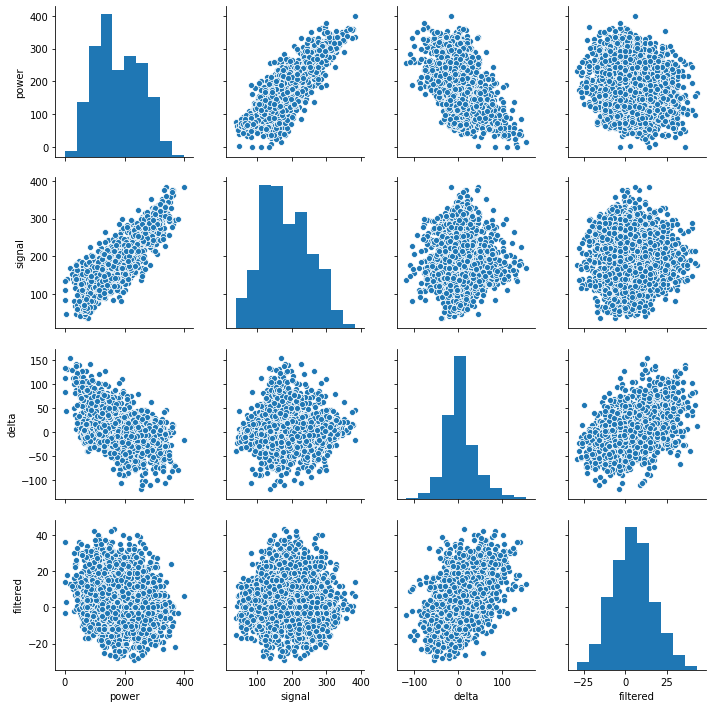

In [5]:
import seaborn as sns
sns.pairplot(df)
## grafica de correlacion 

In [6]:
import statsmodels.api as sm

In [7]:
x_var = ['power','signal','delta']
x = df[x_var]
x = sm.add_constant(x)
y = df['filtered']

/Users/bastianjensen/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [8]:
modelo = sm.OLS(y,x).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:               filtered   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     282.0
Date:                Tue, 27 Aug 2019   Prob (F-statistic):          2.94e-112
Time:                        15:17:09   Log-Likelihood:                -10674.
No. Observations:                2786   AIC:                         2.135e+04
Df Residuals:                    2783   BIC:                         2.137e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8011      0.606      6.270      0.0

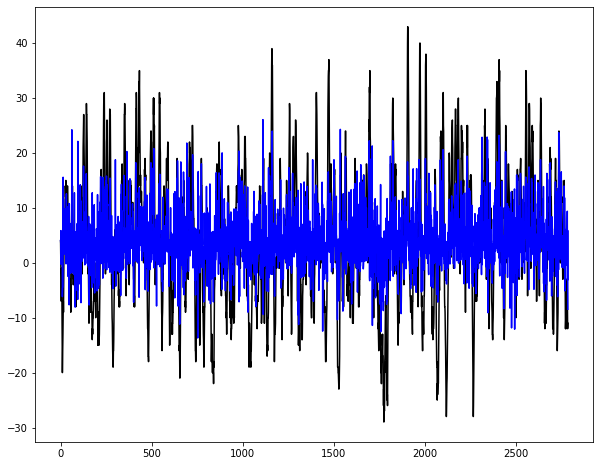

In [9]:
fig, ax = plt.subplots(figsize = (10,8))
x= np.arange(len(y))
ax.plot(x,y,'k', label= 'data')
ax.plot(x, modelo.fittedvalues, 'b' , label= 'OLS')